In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## apply
DFS遍历所有子模块，并在每个模块上使用apply的函数

he


<AxesSubplot:ylabel='Count'>

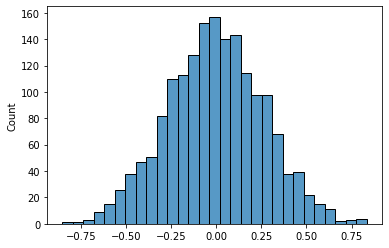

In [46]:
def init_weights(m):
    try:
        if isinstance(m, nn.Conv2d):
            # m.weight.data.normal_(0, 0.02)
            nn.init.kaiming_normal_(m.weight.data)
            m.bias.data.zero_()
        elif isinstance(m, nn.ConvTranspose2d):
            m.weight.data.normal_(0, 0.02)
            m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 0.02)
            m.bias.data.zero_()
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()
    except Exception as e:
        print(f'SKip layer {m}, {e}')
        pass

model = nn.Sequential(
    nn.Conv2d(3, 64, 3, padding=1),
    nn.Flatten(),
    nn.Linear(7*7*64, 2)
)

X = torch.randn(1, 3, 7, 7)

list(model.named_children())
model.apply(init_weights)

sns.histplot(model[0].weight.detach().numpy().reshape(-1))